# 


# 🖐Project_02 와인 데이터를 분류 해봅시다.

## 🧡 모듈 정리

In [1]:
# (1) 모듈 임포트
from sklearn.datasets import load_wine # 데이터셋 불러오기
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터 분리
from sklearn.metrics import classification_report # 성능 평가 지표
from sklearn.metrics import accuracy_score # 정확도 측정
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 분류기
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류기
from sklearn import svm # 서포트 벡터 머신 분류기
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent 분류기
from sklearn.linear_model import LogisticRegression # LogisticRegression 분류기
from sklearn.metrics import confusion_matrix # 오차 정렬
import matplotlib.pyplot as plt #  시각화 모듈
%matplotlib inline 
import pandas as pd # 데이터 프레임 모듈
import warnings
warnings.filterwarnings( 'ignore' ) # 경고 문구 무시

## 💛 데이터셋 준비

In [2]:
# (2) 데이터 준비
wine = load_wine()
wine_data = wine.data # 학습 해야할 데이터
wine_label = wine.target # 정답지 데이터

## 💜데이터셋 👉 데이터 프레임 화 
- pd.DataFrame(data,columns)

In [3]:
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 💚 학습 데이터와 테스트 데이터 분리
- train_test_split(학습 데이터, 정답지, 테스트 데이터 비율, 랜덤 스테이트)

In [4]:
# (3) train, test 데이터 분리
""" """
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)                                                                  

## 💙 (4) 모델 학습 및 예측
- 5가지 모델을 통해 데이터를 학습 해보자!

In [5]:

# (4-1) 모델 학습 및 예측 : DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32) # 분류 모델 불러오기
decision_tree.fit(X_train, y_train) # 데이터 학습
y_pred = decision_tree.predict(X_test) # 테스트 데이터에 적용
DT = classification_report(y_test, y_pred)
dt_score = accuracy_score(y_test, y_pred)
print('D.T의 성능 평가 지표 ')
print(DT) # 학습한 결과와 정답지 비교
print('-'*100)

# (4-2) 모델 학습 및 예측 : RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
RF = classification_report(y_test, y_pred)
rf_score = accuracy_score(y_test, y_pred)
print('R.F의 성능 평가 지표 ')
print(RF)
print('-'*100)

# (4-3) 모델 학습 및 예측 : svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_ = classification_report(y_test, y_pred)
svm_score = accuracy_score(y_test, y_pred)
print('svm의 성능 평가 지표 ')
print(svm_)
print('-'*100)

# (4-4) 모델 학습 및 예측 : SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
SGD = classification_report(y_test, y_pred)
sgd_score = accuracy_score(y_test, y_pred)
print('SGD의 성능 평가 지표 ')
print(SGD)
print('-'*100)

# (4-5) 모델 학습 및 예측 : LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
LR = classification_report(y_test, y_pred)
lr_score = accuracy_score(y_test, y_pred)
print('L.R의 성능 평가 지표 ')
print(LR)

D.T의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

----------------------------------------------------------------------------------------------------
R.F의 성능 평가 지표 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----------------------------------------------------------------------------------------------------
svm의 성

## 🤍 시각화를 통해 결과 비교하기
- matplotlib의 막대 그래프를 통해 어떤 모델의 정확도가 가장 높았는지 비교 해보자!

Text(0.5, 1.0, 'Models Compare')

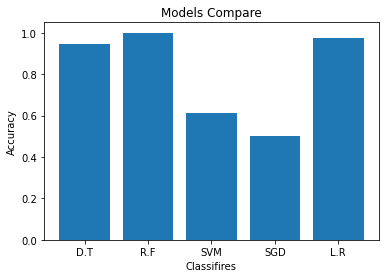

In [6]:
#  각 모델의 정확도 데이터
scores = [dt_score,rf_score,svm_score,sgd_score,lr_score]
names = ['D.T','R.F','SVM','SGD','L.R']

# 그래프 그리기
plt.bar(names,scores)

# 라벨, 타이틀 달기
plt.xlabel('Classifires')
plt.ylabel('Accuracy')
plt.title("Models Compare")

## 😆짧막 회고
- 5개의 분류 모델의 성능 평가를 시각화해 본 결과 와인 등급 분류에는 R.F모델이 효과적인 모델이라고 볼 수 있겠다.